## arbre de decision

In [1]:
## file banknote.csv
import pandas as pd
import numpy as np



banknote=pd.read_csv('/Users/gnabeyeuemmanuel/Desktop/datasets/banknote.csv', encoding='latin')
print('Shape before deleting duplicate values:', banknote.shape)

# Removing duplicate rows if any
banknote=banknote.drop_duplicates()
print('Shape After deleting duplicate values:', banknote.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
banknote.head(10)

Shape before deleting duplicate values: (1372, 5)
Shape After deleting duplicate values: (1348, 5)


,variance of Wavelet,skewness of Wavelet,curtosis of Wavelet,entropy,class
0,3.62160,8.6661,-2.80730,-0.44699,1.0
1,4.54590,8.1674,-2.45860,-1.46210,1.0
2,3.86600,-2.6383,1.92420,0.10645,1.0
3,3.45660,9.5228,-4.01120,-3.59440,1.0
4,0.32924,-4.4552,4.57180,-0.98880,1.0
5,4.36840,9.6718,-3.96060,-3.16250,1.0
6,3.59120,3.0129,0.72888,0.56421,1.0
7,2.09220,-6.8100,8.46360,-0.60216,1.0
8,3.20320,5.7588,-0.75345,-0.61251,1.0
9,1.53560,9.1772,-2.27180,-0.73535,1.0


In [2]:

from sklearn import tree
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(banknote,test_size=0.2,random_state=428)

Predictors=['variance of Wavelet','skewness of Wavelet','curtosis of Wavelet','entropy']
TargetVariable = 'class'

X_train_set=train_set[Predictors].values
y_train_set=train_set[TargetVariable].values
X_test_set=train_set[Predictors].values
y_test_set=train_set[TargetVariable].values

X=banknote[Predictors].values
y=banknote[TargetVariable].values

#Decision Trees
from sklearn import tree
# choose from different tunable hyper parameters
# Choose various values of max_depth and criterion for tuning the model
clf = tree.DecisionTreeClassifier(max_depth=4,criterion='gini')

## max_depth,      
## criterion{“gini”, “entropy”}, default=”gini”
## min_samples_splitint or float, default=2   :The minimum number of samples required to split an internal node:
## min_samples_leafint or float, default=1:
##   The minimum number of samples required to be at a leaf node. 
##   A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.


# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train_set,y_train_set)
prediction=DTree.predict(X_test_set)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test_set, prediction))
print(metrics.confusion_matrix(y_test_set, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test_set, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))


# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


DecisionTreeClassifier(max_depth=4)
              precision    recall  f1-score   support

         1.0       0.99      0.99      0.99       589
         2.0       0.99      0.99      0.99       489

    accuracy                           0.99      1078
   macro avg       0.99      0.99      0.99      1078
weighted avg       0.99      0.99      0.99      1078

[[582   7]
 [  6 483]]
Accuracy of the model on Testing Sample Data: 0.99

Accuracy values for 10-fold Cross Validation:
 [0.97781456 0.97042916 0.94036257 0.95560956 0.97042916 0.94810788
 0.97779253 0.97781456 0.97764576 0.95522388]

Final Average Accuracy of the model: 0.97


<AxesSubplot:>

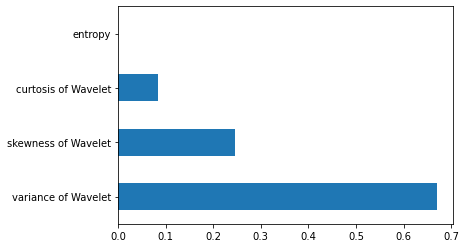

In [3]:
import matplotlib.pyplot as plt

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')



In [4]:
 from sklearn.tree import export_text

r = export_text(clf, feature_names=Predictors)
    
print(r)  

|--- variance of Wavelet <= 0.71
|   |--- skewness of Wavelet <= 5.16
|   |   |--- curtosis of Wavelet <= 3.05
|   |   |   |--- class: 2.0
|   |   |--- curtosis of Wavelet >  3.05
|   |   |   |--- skewness of Wavelet <= -1.73
|   |   |   |   |--- class: 2.0
|   |   |   |--- skewness of Wavelet >  -1.73
|   |   |   |   |--- class: 1.0
|   |--- skewness of Wavelet >  5.16
|   |   |--- variance of Wavelet <= -3.44
|   |   |   |--- class: 2.0
|   |   |--- variance of Wavelet >  -3.44
|   |   |   |--- class: 1.0
|--- variance of Wavelet >  0.71
|   |--- curtosis of Wavelet <= -4.46
|   |   |--- variance of Wavelet <= 3.30
|   |   |   |--- class: 2.0
|   |   |--- variance of Wavelet >  3.30
|   |   |   |--- class: 1.0
|   |--- curtosis of Wavelet >  -4.46
|   |   |--- variance of Wavelet <= 1.59
|   |   |   |--- curtosis of Wavelet <= -2.29
|   |   |   |   |--- class: 2.0
|   |   |   |--- curtosis of Wavelet >  -2.29
|   |   |   |   |--- class: 1.0
|   |   |--- variance of Wavelet >  1.59
| 

TypeError: annotate() missing 1 required positional argument: 'text'

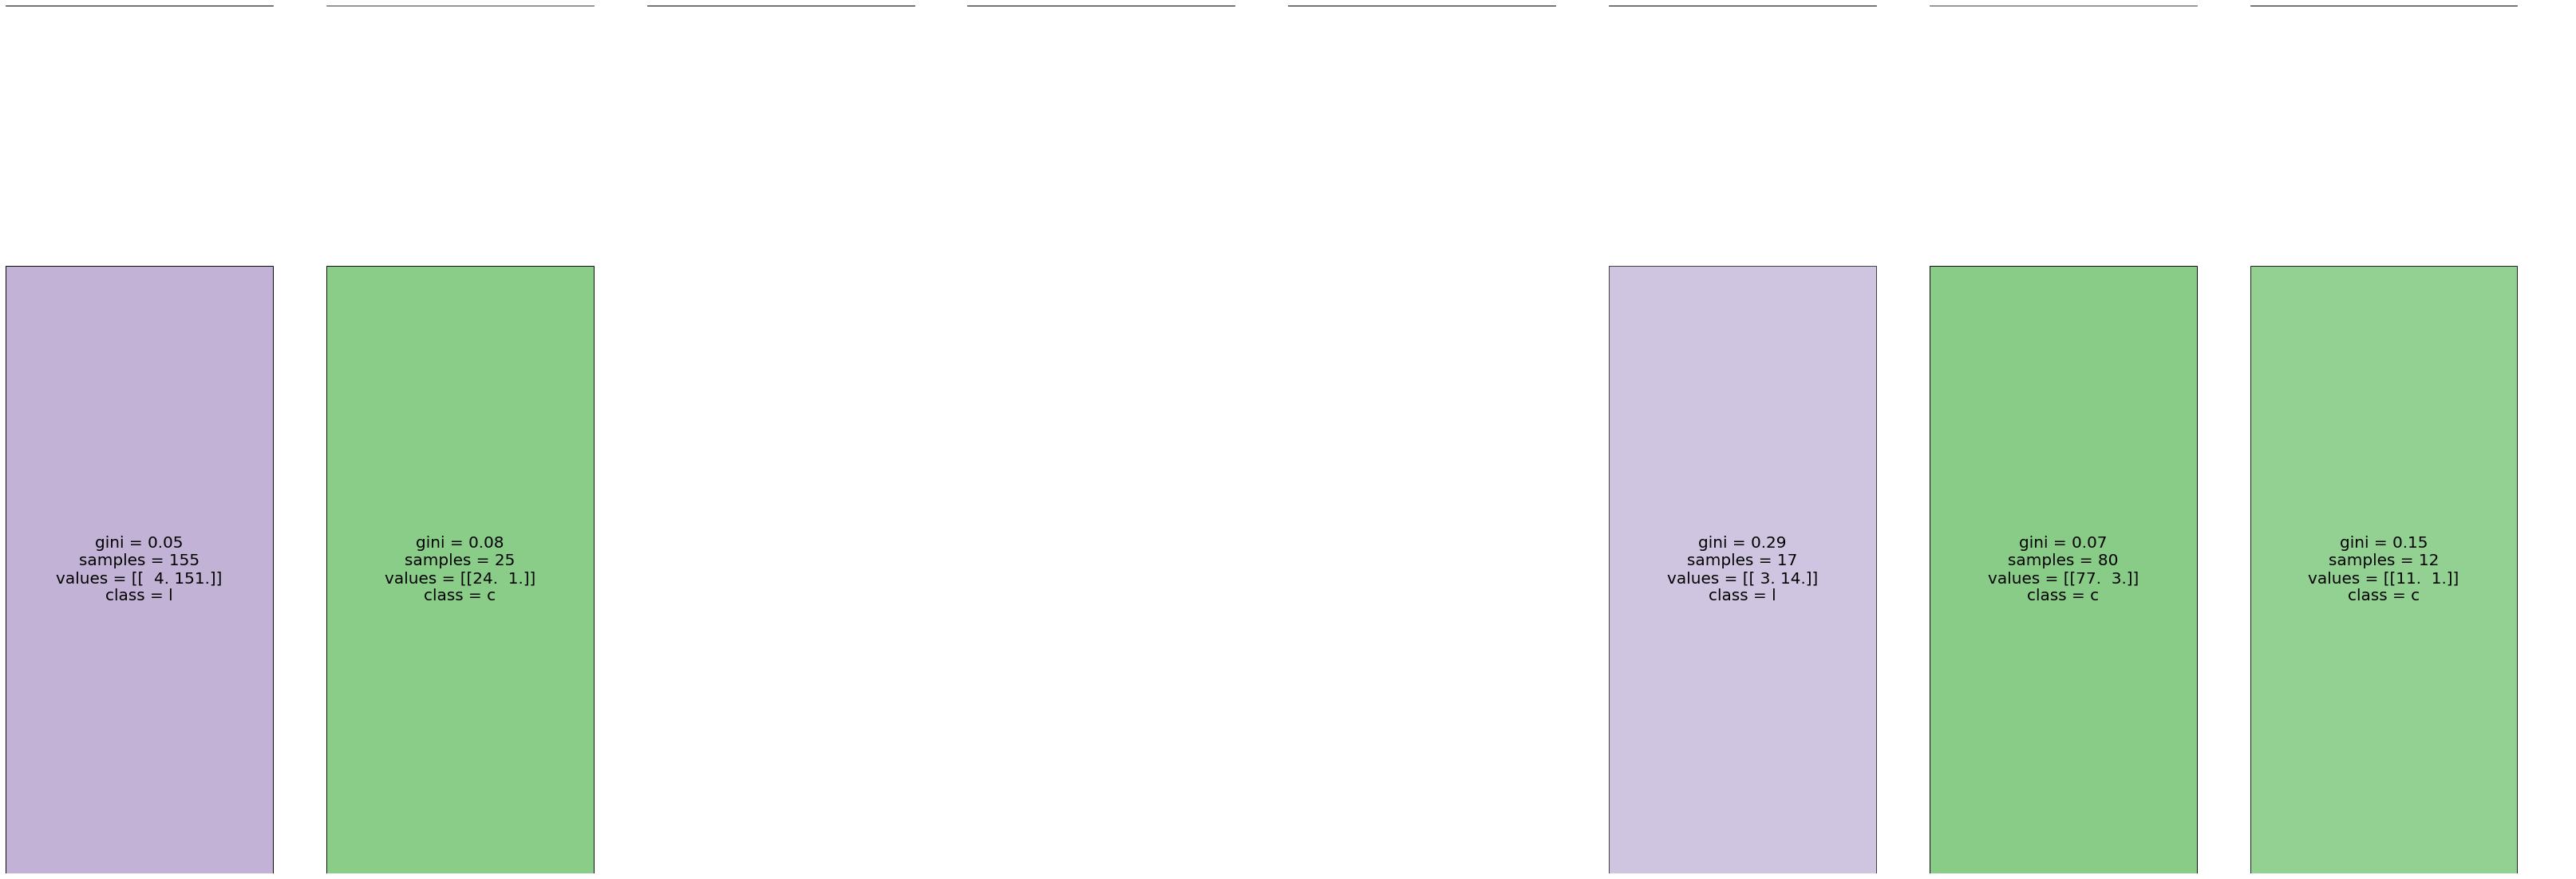

In [12]:
from dtreeplt import dtreeplt
dtree = dtreeplt(model=clf, feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()


In [11]:
pip install dtreeplt

Note: you may need to restart the kernel to use updated packages.


## SHAP

In [6]:
### pip install shap

# import shap library
import shap


## delete the column of y

a=train_set.drop(labels='class',axis=1)
a.head()

,variance of Wavelet,skewness of Wavelet,curtosis of Wavelet,entropy
323,3.88400,10.0277,-3.92980,-4.081900
1290,0.11032,1.9741,-3.36680,-0.652590
994,-0.87340,1.6533,-2.19640,-0.780610
1077,-1.60010,-9.5828,9.40440,0.081882
929,-3.91720,2.6652,0.78886,-0.781900


In [7]:
explainer = shap.Explainer(DTree, a)


In [8]:
## get the shap values

shap_values = explainer(a)


In [9]:
shap_values

.values =
array([[[ 0.3156754 , -0.31567541],
        [ 0.17876559, -0.17876559],
        [-0.03775558,  0.03775558],
        [ 0.        ,  0.        ]],

       [[-0.29156074,  0.29156074],
        [-0.04710968,  0.04710968],
        [-0.20197751,  0.20197752],
        [ 0.        ,  0.        ]],

       [[-0.32693206,  0.32693206],
        [-0.04710968,  0.04710968],
        [-0.16660619,  0.1666062 ],
        [ 0.        ,  0.        ]],

       ...,

       [[ 0.44251054, -0.44251055],
        [-0.06947957,  0.06947957],
        [ 0.08365445, -0.08365445],
        [ 0.        ,  0.        ]],

       [[ 0.2956754 , -0.29567541],
        [ 0.17876559, -0.17876559],
        [-0.01775558,  0.01775558],
        [ 0.        ,  0.        ]],

       [[-0.32693206,  0.32693206],
        [-0.04710968,  0.04710968],
        [-0.16660619,  0.1666062 ],
        [ 0.        ,  0.        ]]])

.base_values =
array([[0.54064793, 0.45935207],
       [0.54064793, 0.45935207],
       [0.54064793,

## we can see that, for a binary classification. For each feature, each observation, we have two shap values, (one for class 1.0, one for class 2.0) 

In [10]:
shap_values.values[0]

array([[ 0.3156754 , -0.31567541],
       [ 0.17876559, -0.17876559],
       [-0.03775558,  0.03775558],
       [ 0.        ,  0.        ]])

### waterfall

In [13]:
## because the function waterfall_plot()
Nfeature=4

class helper_object():
    """
    This wraps the shap object.
    It takes as input i, which indicates the index of the observation to be explained.
    """
    def __init__(self, i):
        self.base_values = shap_values.base_values[i][0]
        self.data = a.iloc[i]
        self.feature_names = a.columns.to_list()
        self.values = []
        for j in range(Nfeature):
            self.values.append(shap_values.values[i][j][0])
        self.values= np.array(self.values)

print(helper_object(0).values)  
print(helper_object(0).data)
print(helper_object(0).base_values)
print(helper_object(0).feature_names)


[ 0.3156754   0.17876559 -0.03775558  0.        ]
variance of Wavelet     3.8840
skewness of Wavelet    10.0277
curtosis of Wavelet    -3.9298
entropy                -4.0819
Name: 323, dtype: float64
0.5406479316888039
['variance of Wavelet', 'skewness of Wavelet', 'curtosis of Wavelet', 'entropy']


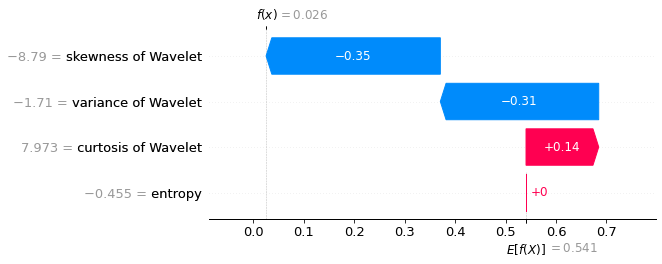

In [14]:
## give the waterfall plot of the 81th observation

shap.waterfall_plot(helper_object(80), len(shap_values[0]))




### scatter

In [15]:
shap_values.values

array([[[ 0.3156754 , -0.31567541],
        [ 0.17876559, -0.17876559],
        [-0.03775558,  0.03775558],
        [ 0.        ,  0.        ]],

       [[-0.29156074,  0.29156074],
        [-0.04710968,  0.04710968],
        [-0.20197751,  0.20197752],
        [ 0.        ,  0.        ]],

       [[-0.32693206,  0.32693206],
        [-0.04710968,  0.04710968],
        [-0.16660619,  0.1666062 ],
        [ 0.        ,  0.        ]],

       ...,

       [[ 0.44251054, -0.44251055],
        [-0.06947957,  0.06947957],
        [ 0.08365445, -0.08365445],
        [ 0.        ,  0.        ]],

       [[ 0.2956754 , -0.29567541],
        [ 0.17876559, -0.17876559],
        [-0.01775558,  0.01775558],
        [ 0.        ,  0.        ]],

       [[-0.32693206,  0.32693206],
        [-0.04710968,  0.04710968],
        [-0.16660619,  0.1666062 ],
        [ 0.        ,  0.        ]]])

In [16]:
shap_values[:,0]

.values =
array([[ 0.3156754 , -0.31567541],
       [-0.29156074,  0.29156074],
       [-0.32693206,  0.32693206],
       ...,
       [ 0.44251054, -0.44251055],
       [ 0.2956754 , -0.29567541],
       [-0.32693206,  0.32693206]])

.base_values =
array([[0.54064793, 0.45935207],
       [0.54064793, 0.45935207],
       [0.54064793, 0.45935207],
       ...,
       [0.54064793, 0.45935207],
       [0.54064793, 0.45935207],
       [0.54064793, 0.45935207]])

.data =
array([ 3.884  ,  0.11032, -0.8734 , ...,  4.3846 ,  2.4008 , -1.0833 ])

In [17]:
shap_values[:,0,0]

.values =
array([ 0.3156754 , -0.29156074, -0.32693206, ...,  0.44251054,
        0.2956754 , -0.32693206])

.base_values =
array([0.54064793, 0.54064793, 0.54064793, ..., 0.54064793, 0.54064793,
       0.54064793])

.data =
array([ 3.884  ,  0.11032, -0.8734 , ...,  4.3846 ,  2.4008 , -1.0833 ])

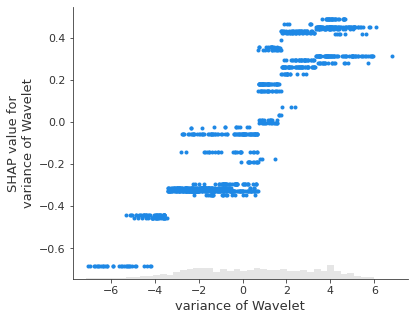

In [18]:
shap.plots.scatter(shap_values[:,0,0])   

## the last 0 means, we take the shap value of class 0
## the first 0 means, we want to see influence of feature[0]: variance of Wavelet

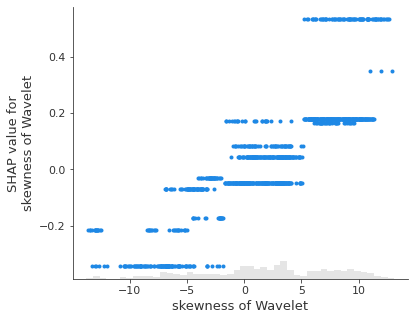

In [19]:
shap.plots.scatter(shap_values[:,1,0])   

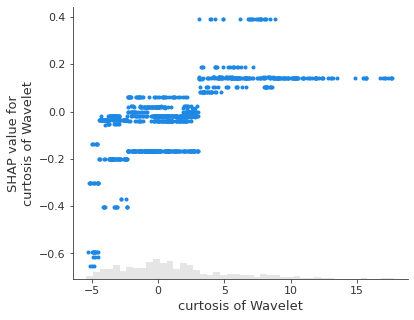

In [20]:
shap.plots.scatter(shap_values[:,2,0])   

### beeswarm

In [21]:
shap_values2=shap_values.values[:,:,0]

In [22]:
shap_values2

## get the shap values, of class1.0

array([[ 0.3156754 ,  0.17876559, -0.03775558,  0.        ],
       [-0.29156074, -0.04710968, -0.20197751,  0.        ],
       [-0.32693206, -0.04710968, -0.16660619,  0.        ],
       ...,
       [ 0.44251054, -0.06947957,  0.08365445,  0.        ],
       [ 0.2956754 ,  0.17876559, -0.01775558,  0.        ],
       [-0.32693206, -0.04710968, -0.16660619,  0.        ]])

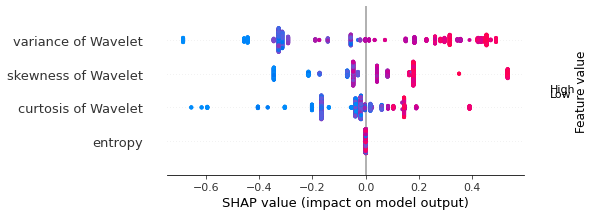

In [23]:
shap.summary_plot(shap_values2, a)


### bar

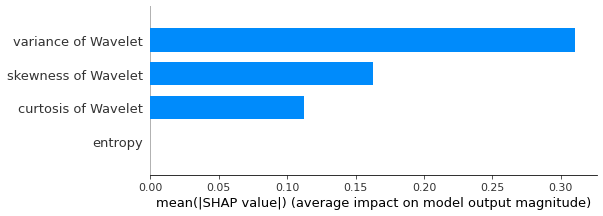

In [24]:
shap.summary_plot(shap_values2,a,plot_type="bar")

### force

In [25]:
## I do not know why
shap.initjs()


In [26]:
shap.plots.force(explainer.expected_value[0],shap_values2,features=np.array(a),feature_names=Predictors)

### LIME

In [28]:

from lime import lime_tabular

explainer3 = lime_tabular.LimeTabularExplainer(X_train_set,mode="classification",feature_names=Predictors,class_names=TargetVariable)


ModuleNotFoundError: No module named 'lime'

In [29]:


## give the explanation of the 11th observation

explanation = explainer3.explain_instance(X_test_set[10], clf.predict_proba,
                                         num_features=len(Predictors))


NameError: name 'explainer3' is not defined

In [30]:
explanation.show_in_notebook()


NameError: name 'explanation' is not defined